In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [52]:
# read companies file with entries separated by tab
companies = pd.read_csv('companies.txt', encoding = "ISO-8859-1", sep='\t')
# read rounds2 csv
rounds2 = pd.read_csv('rounds2.csv', encoding = "ISO-8859-1")

In [53]:
# get number of unique companies in rounds2 dataset
print('Number of unique companies in rounds2:', rounds2['company_permalink'].nunique(dropna=True))

Number of unique companies in rounds2: 90247


In [54]:
# get number of unique companies in companies dataset
companies['permalink'].nunique(dropna=True)
print('Number of unique companies in companies:', companies['permalink'].nunique(dropna=True))

Number of unique companies in companies: 66368


In [5]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [67]:
# since the case of permalink is not same in both the datasets, lower case the keys for merging
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [68]:
# inner merge on permalink
master_frame = companies.merge(rounds2, how='inner', left_on='permalink', right_on='company_permalink')

In [69]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [70]:
# Data cleanup
# Find the percentage of missing values
print('Percentage of NaN values:', \
       master_frame.isnull().sum()/len(master_frame.index) * 100)

Percentage of NaN values: permalink                   0.000000
name                        0.000870
homepage_url                5.334865
category_list               2.964104
status                      0.000000
country_code                7.543805
state_code                  9.516974
region                      8.839241
city                        8.836631
founded_at                 17.852482
company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.908945
funded_at                   0.000000
raised_amount_usd          17.386160
dtype: float64


In [71]:
# cleanup missing values by dropping nan in raised amount, category_list and country code as these are the relevant columns
master_frame.dropna(subset=['raised_amount_usd', 'category_list', 'country_code'], inplace=True)

In [72]:
print('Percentage of NaN values after cleanup:', \
       master_frame.isnull().sum()/len(master_frame.index) * 100)

Percentage of NaN values after cleanup: permalink                   0.000000
name                        0.001130
homepage_url                3.672243
category_list               0.000000
status                      0.000000
country_code                0.000000
state_code                  1.955291
region                      1.337415
city                        1.334026
founded_at                 15.101266
company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         69.754544
funded_at                   0.000000
raised_amount_usd           0.000000
dtype: float64


In [73]:
# get average funding for each funding type
mean_df = master_frame.groupby('funding_round_type').mean()
avg_venture_amount = mean_df['raised_amount_usd']['venture']
print(f'Average funding amount of venture type:{round(avg_venture_amount, 2)}')
avg_angel_amount = mean_df['raised_amount_usd']['angel']
print(f'Average funding amount of angel type:{round(avg_angel_amount, 2)}')
avg_seed_amount = mean_df['raised_amount_usd']['seed']
print(f'Average funding amount of seed type:{round(avg_seed_amount, 2)}')
avg_pe_amount = mean_df['raised_amount_usd']['private_equity']
print(f'Average funding amount of private_equity type:{round(avg_pe_amount, 2)}')

Average funding amount of venture type:11724222.69
Average funding amount of angel type:971573.89
Average funding amount of seed type:747793.68
Average funding amount of private_equity type:73938486.28


In [74]:
top9 = master_frame[master_frame['funding_round_type']=='venture'].groupby('country_code').sum().sort_values('raised_amount_usd', ascending=False).head(9)

In [75]:
# top 9 countries in terms of veture investment across sectors 
top9

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


In [76]:
# read mappings file
map_df = pd.read_csv('mapping.csv')

In [77]:
map_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [78]:
# cleanup map_df
map_df.isnull().sum()/len(map_df.index)

category_list                              0.001453
Automotive & Sports                        0.000000
Blanks                                     0.000000
Cleantech / Semiconductors                 0.000000
Entertainment                              0.000000
Health                                     0.000000
Manufacturing                              0.000000
News, Search and Messaging                 0.000000
Others                                     0.000000
Social, Finance, Analytics, Advertising    0.000000
dtype: float64

In [79]:
# clean up NaN category list
map_df.dropna(subset=['category_list'], inplace=True)

In [80]:
map_df.isnull().sum()/len(map_df.index)

category_list                              0.0
Automotive & Sports                        0.0
Blanks                                     0.0
Cleantech / Semiconductors                 0.0
Entertainment                              0.0
Health                                     0.0
Manufacturing                              0.0
News, Search and Messaging                 0.0
Others                                     0.0
Social, Finance, Analytics, Advertising    0.0
dtype: float64

In [81]:
# update primary sector in master dataframe
master_frame['primary_sector'] = master_frame['category_list'].str.split('|').str[0]
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,Application Platforms
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,Games
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Biotechnology


In [89]:
# create a copy of mapping dataset
mapped_df = map_df.filter(['category_list'], axis=1)

# function to get column name with value one for each row in mapping dataframe
def get_main_sector(row):
    return(row.index[row.apply(lambda x: x==1)][0])
    
# prepare a main_sector column which contains the mapping of primary sector
mapped_df['main_sector'] = map_df.apply(lambda row:get_main_sector(row), axis=1)
mapped_df.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health


In [90]:
# merge master df with a mapping to main sector
merged_df = master_frame.merge(mapped_df, how='inner', left_on='primary_sector', right_on='category_list')
merged_df.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Media,Entertainment
4,/organization/a-dance-for-me,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.0,Media,Media,Entertainment


In [91]:
D1 = merged_df[(merged_df['country_code'] == 'USA') \
          & (merged_df['funding_round_type'] == 'venture')  \
          & (merged_df['raised_amount_usd'] <= 15000000) \
          & (merged_df['raised_amount_usd'] >= 5000000)]

D2 = merged_df[(merged_df['country_code'] == 'GBR') \
          & (merged_df['funding_round_type'] == 'venture')  \
          & (merged_df['raised_amount_usd'] <= 15000000) \
          & (merged_df['raised_amount_usd'] >= 5000000)]

D3 = merged_df[(merged_df['country_code'] == 'IND') \
          & (merged_df['funding_round_type'] == 'venture')  \
          & (merged_df['raised_amount_usd'] <= 15000000) \
          & (merged_df['raised_amount_usd'] >= 5000000)]

In [94]:
investment_count_D1 = D1['raised_amount_usd'].count()
print(f'Number of investments in USA: {investment_count_D1}')
investment_count_D2 = D2['raised_amount_usd'].count()
print(f'Number of investments in GBR: {investment_count_D2}')
investment_count_D3 = D3['raised_amount_usd'].count()
print(f'Number of investments in IND: {investment_count_D3}')

Number of investments in USA: 11149
Number of investments in GBR: 577
Number of investments in IND: 299


In [96]:
investment_amount_D1 = D1['raised_amount_usd'].sum()
print(f'Amount of investments in USA: {investment_amount_D1}')
investment_amount_D2 = D2['raised_amount_usd'].sum()
print(f'Amount of investments in GBR: {investment_amount_D2}')
investment_amount_D3 = D3['raised_amount_usd'].sum()
print(f'Amount of investments in IND: {investment_amount_D3}')

Amount of investments in USA: 99661524549.0
Amount of investments in GBR: 5028704358.0
Amount of investments in IND: 2683537552.0


In [104]:
# top sectors in terms of number of investments and their counts
top3_sector_count_D1 = D1.groupby('main_sector').count().sort_values('raised_amount_usd', ascending=False)['raised_amount_usd'].head(3)
top3_sector_count_D2 = D2.groupby('main_sector').count().sort_values('raised_amount_usd', ascending=False)['raised_amount_usd'].head(3)
top3_sector_count_D3 = D3.groupby('main_sector').count().sort_values('raised_amount_usd', ascending=False)['raised_amount_usd'].head(3)

print(f'Top 3 sectors and their investment counts for USA\n{top3_sector_count_D1}')
print(f'Top 3 sectors and their investment counts for GBR\n{top3_sector_count_D2}')
print(f'Top 3 sectors and their investment counts for IND\n{top3_sector_count_D3}')

Top 3 sectors and their investment counts for USA
main_sector
Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
Name: raised_amount_usd, dtype: int64
Top 3 sectors and their investment counts for GBR
main_sector
Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
Name: raised_amount_usd, dtype: int64
Top 3 sectors and their investment counts for IND
main_sector
Others                        109
News, Search and Messaging     52
Entertainment                  33
Name: raised_amount_usd, dtype: int64


In [113]:
top2 = {"USA":[top3_sector_count_D1, D1], "GBR":[top3_sector_count_D2, D2], "IND":[top3_sector_count_D3, D3]}
for country, D in top2.items():
    # company getting highest funding in the top sector
    print(f'Company getting highest funding in top sector in {country}:', \
          D[1][D[1]['main_sector']==D[0].index[0]].sort_values('raised_amount_usd', ascending=False).iloc[0]['name'])
    # company getting highest funding in the second top sector
    print(f'Company getting highest funding in second sector in {country}:', \
          D[1][D[1]['main_sector']==D[0].index[1]].sort_values('raised_amount_usd', ascending=False).iloc[0]['name'])

Company getting highest funding in top sector in USA: 1stdibs
Company getting highest funding in second sector in USA: Sunverge Energy, Inc
Company getting highest funding in top sector in GBR: Tribold
Company getting highest funding in second sector in GBR: Elixent
Company getting highest funding in top sector in IND: ItzCash Card Ltd.
Company getting highest funding in second sector in IND: Mobile2Win India


In [45]:
# plotting

# total investment across
total_investment = master_frame['raised_amount_usd'].sum()

# fraction of total investments in venture type
sum_df = master_frame.groupby('funding_round_type').sum()
venture_p = (sum_df.loc['venture']['raised_amount_usd'] / total_investment) * 100
seed_p = (sum_df.loc['seed']['raised_amount_usd'] / total_investment) * 100
pe_p = (sum_df.loc['private_equity']['raised_amount_usd'] / total_investment) * 100

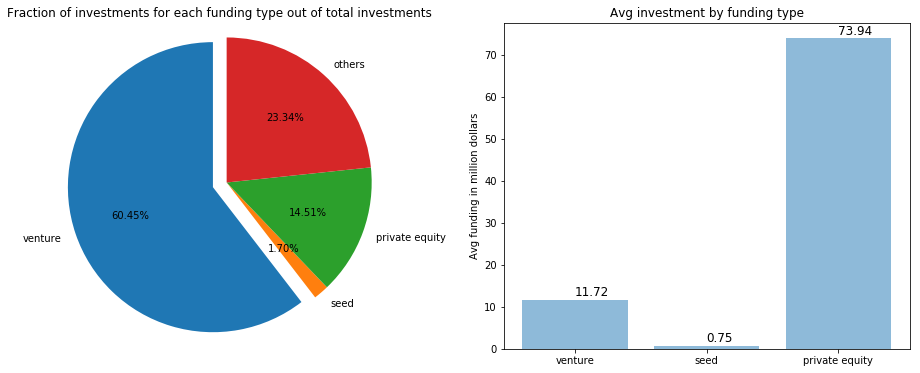

In [114]:
plt.figure(figsize=(16,6))

# subplot 1
plt.subplot(1, 2, 1)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'venture', 'seed', 'private equity', 'others'
sizes = [venture_p, seed_p, pe_p, 100-(venture_p + seed_p + pe_p)]
explode = (0.1, 0, 0, 0)  # only "explode" the venture slice

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fraction of investments for each funding type out of total investments')

# subplot 2
plt.subplot(1, 2, 2)

# Bar chart denoting the average investments in venture, seed and private_equity
labels = ('venture', 'seed', 'private equity')
sizes = [avg_venture_amount/1000000,
         avg_seed_amount/1000000,
         avg_pe_amount/1000000]
plt.bar(labels, sizes, align='center', alpha=0.5)
# Put numerical values as text on bars
for i, x in enumerate(sizes):
    plt.text(i, x+1, s=f"{x:.2f}" , fontdict=dict(fontsize=12))

plt.ylabel('Avg funding in million dollars')
plt.title('Avg investment by funding type')

plt.show()

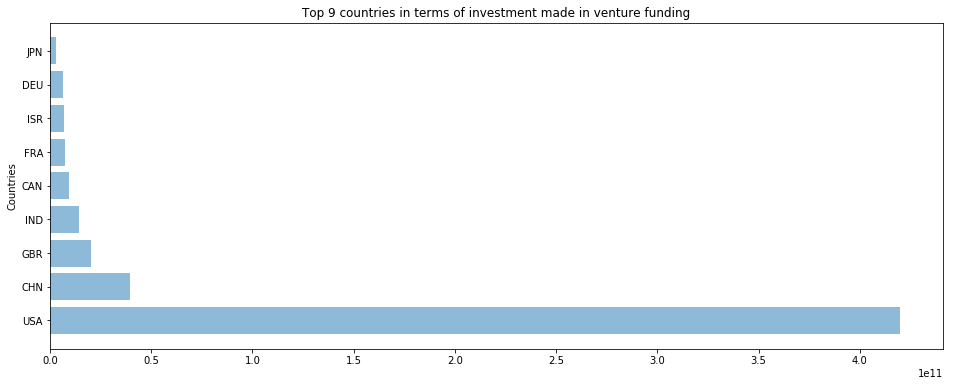

In [115]:
plt.figure(figsize=(16,6))
plt.subplot(1, 1, 1)

labels = top9.index
sizes = top9['raised_amount_usd']
plt.barh(labels, sizes, align='center', alpha=0.5)

plt.ylabel('Countries')
plt.title('Top 9 countries in terms of investment made in venture funding')

plt.show()

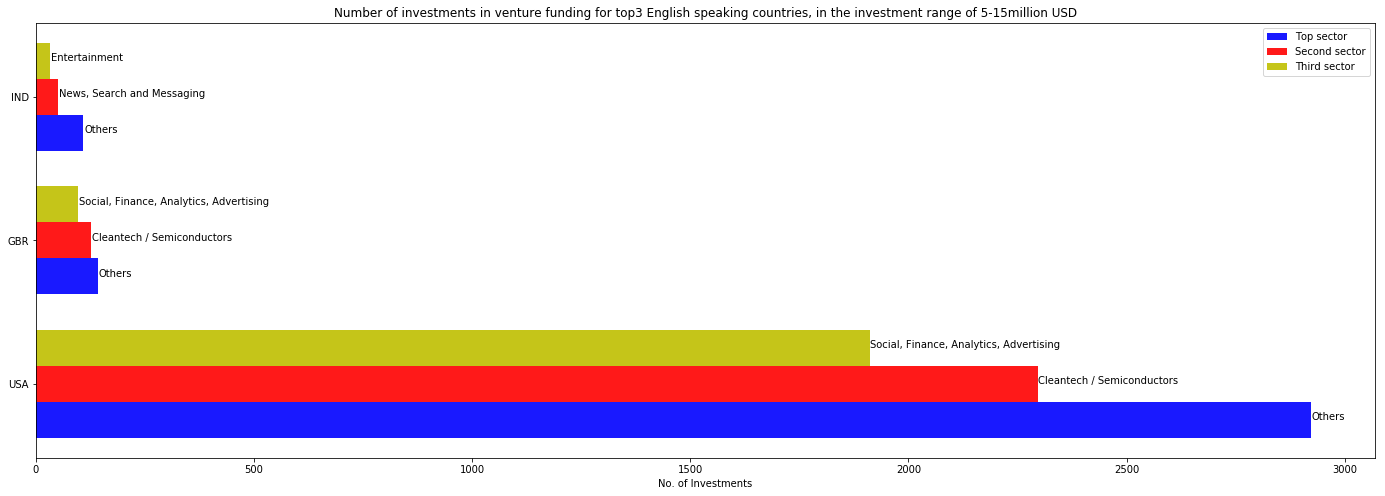

In [116]:
plt.figure(figsize=(24,8))
plt.subplot(1, 1, 1)
labels = (1, 2, 3)

ind = np.arange(3)   # the x locations for the groups
width = 0.25         # the width of the bars

colors = ['b', 'r', 'y']
# in each loop, each sector is plotted for all the 3 countries
for n in range(3):
    sizes = [top3_sector_count_D1[n], top3_sector_count_D2[n], top3_sector_count_D3[n]]
    labels = [top3_sector_count_D1.index[n], top3_sector_count_D2.index[n], top3_sector_count_D3.index[n]]
    plt.barh(ind+(n*width), sizes, height=width, color=colors[n], alpha=0.9)
    for i, x in enumerate(labels):
        plt.text(i+sizes[i], i+(n*width), s=x , fontdict=dict(fontsize=10))

plt.yticks(ind+width, labels=["USA", "GBR", "IND"])
plt.legend(['Top sector', 'Second sector', 'Third sector'])

plt.xlabel('No. of Investments')
plt.title('Number of investments in venture funding for top3 English speaking countries, in the investment range of 5-15million USD')
plt.autoscale()

plt.show()